In [49]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime

**EDA**

In [50]:
# df_green_taxi=pd.read_csv('/kaggle/input/green-taxi-2015/2015_Green_Taxi_Trip_Data_20241019.csv')
df=pd.read_csv('/kaggle/input/green-taxi-2015/2015_Green_Taxi_Trip_Data_20241019.csv',nrows = 100000)

In [51]:
df=df.drop(columns=['vendorid','Store_and_fwd_flag','Payment_type','Total_amount','MTA_tax','Tip_amount','Tolls_amount','Ehail_fee'])

In [52]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

df['pickup_datetime_year']=df['pickup_datetime'].dt.year
df['pickup_datetime_month']=df['pickup_datetime'].dt.month
df['pickup_datetime_day']=df['pickup_datetime'].dt.day
df['pickup_datetime_hour'] = df['pickup_datetime'].dt.hour
df['pickup_datetime_minute'] = df['pickup_datetime'].dt.minute
df['pickup_datetime_second'] = df['pickup_datetime'].dt.second
df['pickup_datetime_weekday'] = df['pickup_datetime'].dt.weekday

df['dropoff_datetime_year'] = df['dropoff_datetime'].dt.year
df['dropoff_datetime_month'] = df['dropoff_datetime'].dt.month
df['dropoff_datetime_day'] = df['dropoff_datetime'].dt.day
df['dropoff_datetime_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_datetime_minute'] = df['dropoff_datetime'].dt.minute
df['dropoff_datetime_second'] = df['dropoff_datetime'].dt.second
df['dropoff_datetime_weekday'] = df['dropoff_datetime'].dt.weekday
df['pickup_datetime_day_of_week_int']=df['pickup_datetime'].dt.weekday
df['dropoff_datetime_day_of_week_int']=df['dropoff_datetime'].dt.weekday
df['trip_duration']=(df['pickup_datetime_hour']-df['dropoff_datetime_hour'])*3600+(df['pickup_datetime_minute']-df['dropoff_datetime_minute'])*60+(df['pickup_datetime_second']-df['dropoff_datetime_second'])

# df.describe()
df=df.drop(columns=['dropoff_datetime','pickup_datetime','dropoff_datetime_year','dropoff_datetime_month','pickup_datetime_year','pickup_datetime_month'])
print(df.head())

   rate_code  Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
0          1        -73.828262        40.693958         -73.776329   
1          1        -73.985672        40.669933         -73.998367   
2          1        -73.892570        40.746658         -73.909294   
3          1        -73.952034        40.714123         -73.957848   
4          1        -73.894104        40.750774         -73.912811   

   Dropoff_latitude  Passenger_count  Trip_distance  Fare_amount  Extra  \
0         40.645348                1           5.95         19.0    0.0   
1         40.679829                3           1.15          7.5    0.0   
2         40.736202                1           1.74          7.5    0.5   
3         40.710945                1           0.50          5.0    0.5   
4         40.755722                2           1.80         11.0    0.0   

   Improvement_surcharge  ...  pickup_datetime_second  \
0                    0.3  ...                      15   
1             

In [53]:
df.describe()
print(df.dtypes)
print(np.mean(df['Fare_amount']))

rate_code                             int64
Pickup_longitude                    float64
Pickup_latitude                     float64
Dropoff_longitude                   float64
Dropoff_latitude                    float64
Passenger_count                       int64
Trip_distance                       float64
Fare_amount                         float64
Extra                               float64
Improvement_surcharge               float64
Trip_type                             int64
pickup_datetime_day                   int32
pickup_datetime_hour                  int32
pickup_datetime_minute                int32
pickup_datetime_second                int32
pickup_datetime_weekday               int32
dropoff_datetime_day                  int32
dropoff_datetime_hour                 int32
dropoff_datetime_minute               int32
dropoff_datetime_second               int32
dropoff_datetime_weekday              int32
pickup_datetime_day_of_week_int       int32
dropoff_datetime_day_of_week_int

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

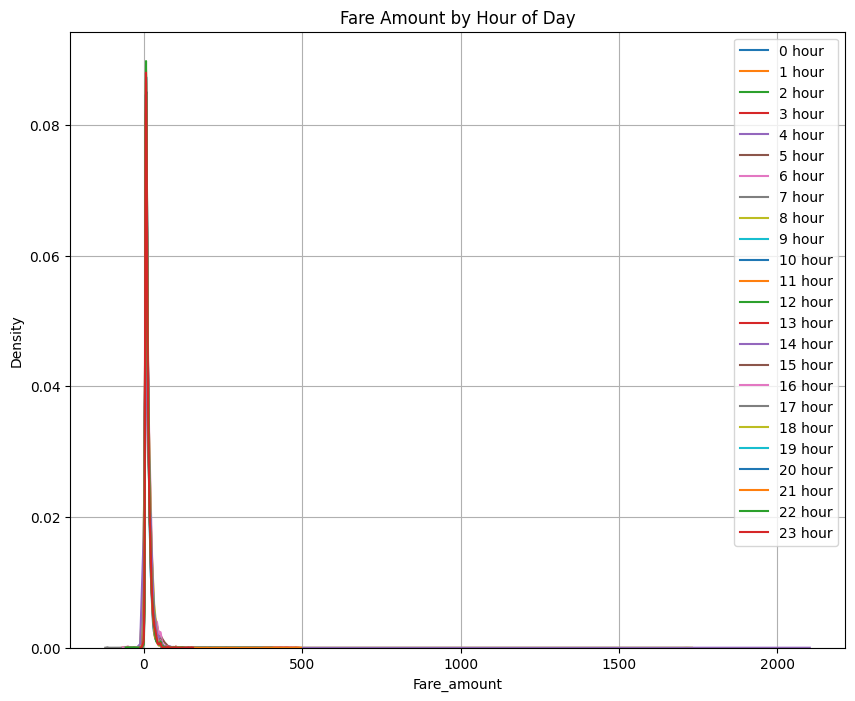

In [54]:
plt.figure(figsize = (10, 8))
for h, grouped in df.groupby('pickup_datetime_hour'):
    sns.kdeplot(grouped['Fare_amount'], label = f'{h} hour')
plt.title('Fare Amount by Hour of Day')
plt.legend()
plt.grid()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

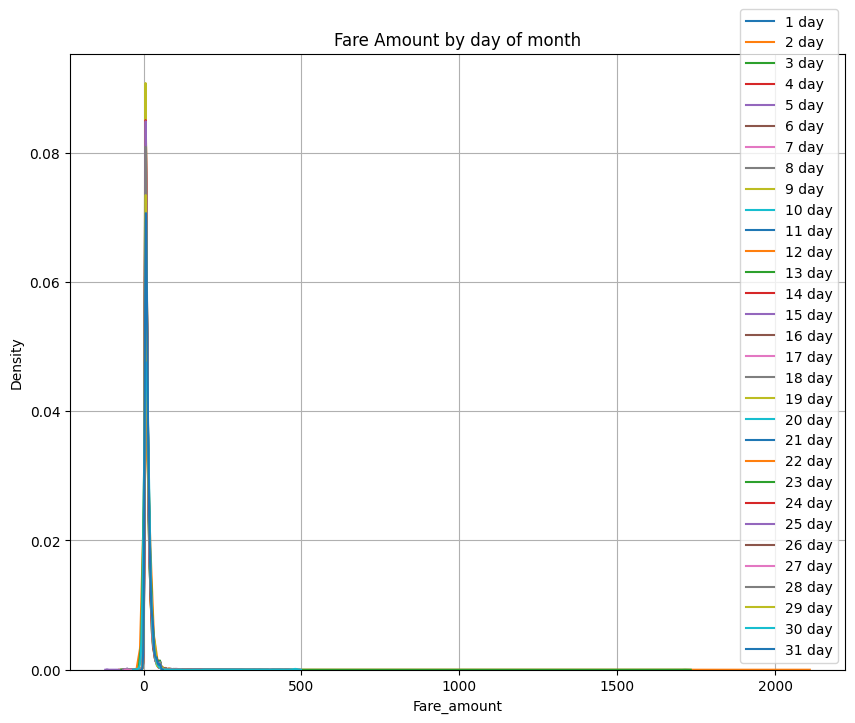

In [55]:
plt.figure(figsize = (10, 8))
for h, grouped in df.groupby('pickup_datetime_day'):
    sns.kdeplot(grouped['Fare_amount'], label = f'{h} day')
plt.title('Fare Amount by day of month')
plt.legend()
plt.grid()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

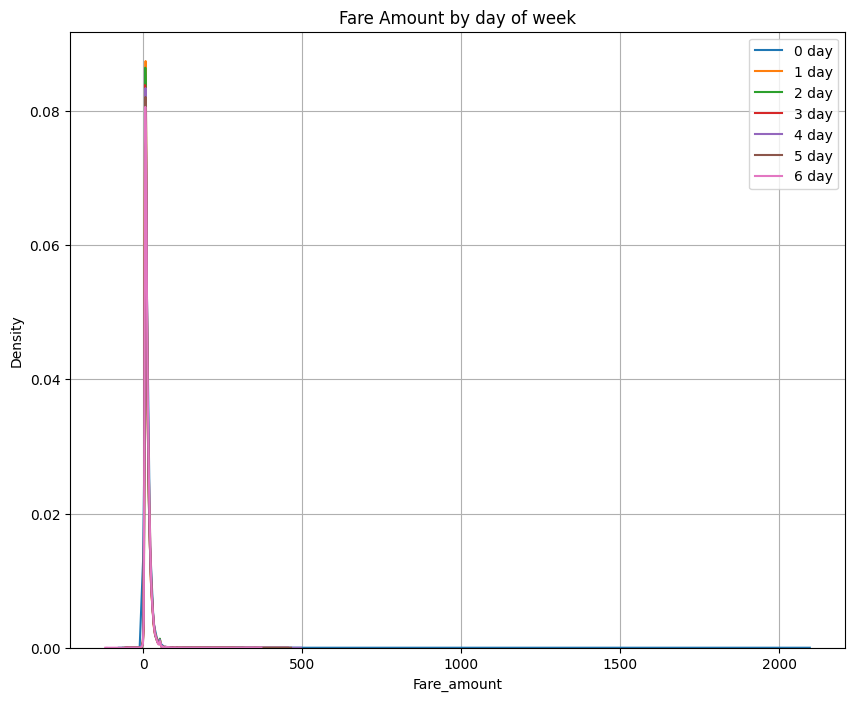

In [56]:
plt.figure(figsize = (10, 8))
for h, grouped in df.groupby('pickup_datetime_day_of_week_int'):
    sns.kdeplot(grouped['Fare_amount'], label = f'{h} day')
plt.title('Fare Amount by day of week')
plt.legend()
plt.grid()

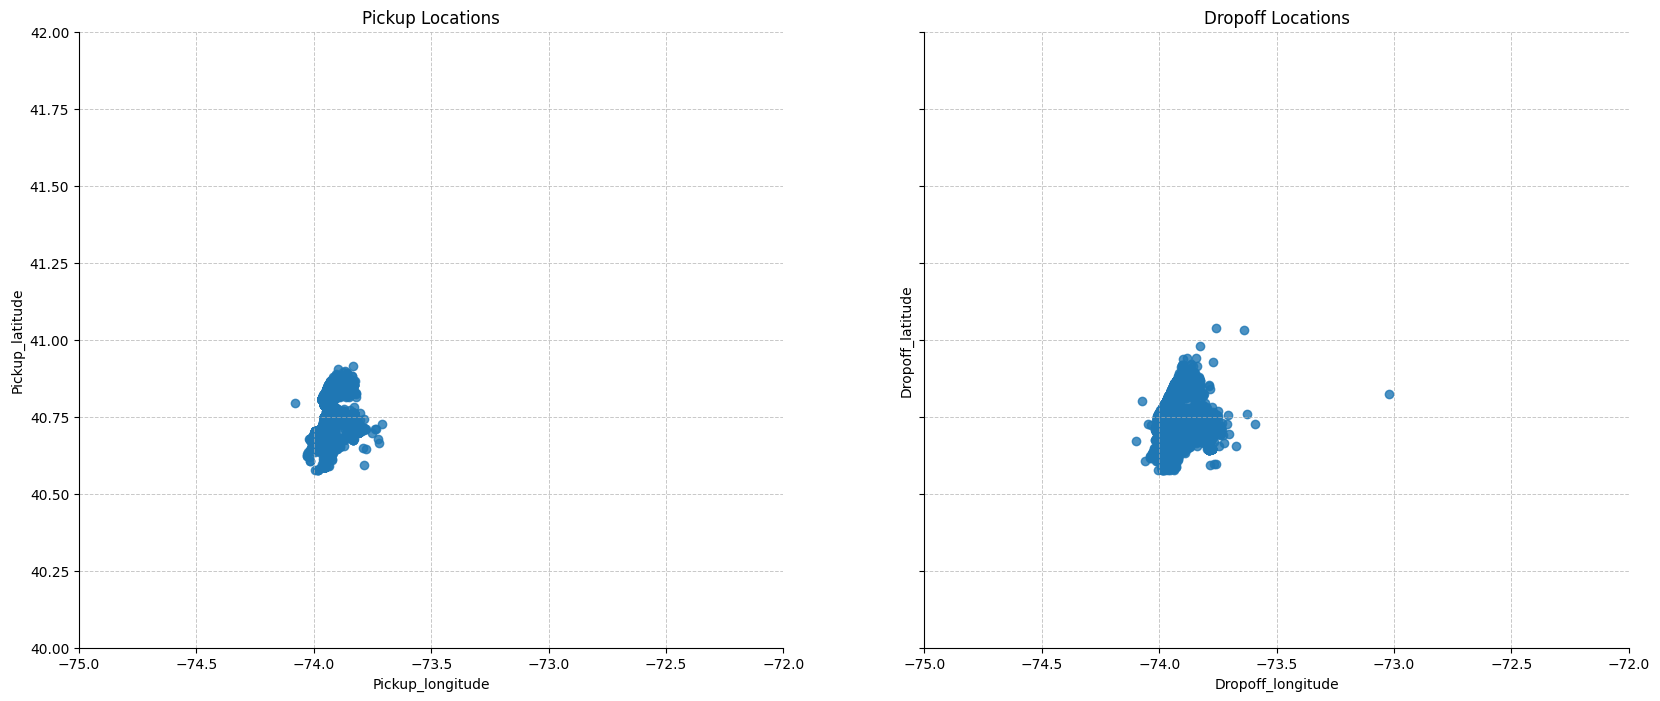

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Sample the data once and reuse it
sampled_df = df.sample(10000, random_state=47)

# Plot pickup locations
sns.regplot(x='Pickup_longitude', y='Pickup_latitude', fit_reg=False, 
            data=sampled_df, ax=axes[0])
# Plot dropoff locations
sns.regplot(x='Dropoff_longitude', y='Dropoff_latitude', fit_reg=False, 
            data=sampled_df, ax=axes[1])

# Set the x and y limits for both plots to focus and center on the desired ranges
x_min, x_max = -75, -72
y_min, y_max = 40, 42

for ax in axes:
    ax.set_xlim(x_min, x_max)   # Set x-axis (longitude) limits
    ax.set_ylim(y_min, y_max)   # Set y-axis (latitude) limits
    ax.spines['bottom'].set_position(('data', 40))  # Center x-axis at latitude 40
    ax.spines['left'].set_position(('data', -75))   # Center y-axis at longitude -75
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.spines['right'].set_visible(False)  # Hide right spine
    ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)  # Add grid lines

axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations')

plt.show()


As seen above the distribution of fares is similar for different day of the week , different day of month and different hour (but hour will not be removed) of the day therefore these features do not influence fares as much. The above plot of pickup/dropoff latitude and longitudes shows most of the pickups/drop offs are between (41.25,40.5) for latitude and (-74.5 to -73.5) for longitudes. Therefore rest of pickups and frop offs are outliers.  

In [58]:
df = df[(df['Trip_distance'] > 0) & (df['Fare_amount'] > 0)]
features = ['Trip_distance', 'Passenger_count']
df = df.loc[df['Trip_distance'] < 100]
df = df.loc[df['Passenger_count'] < 6]
df = df.loc[df["Fare_amount"]<250]
df = df.loc[df["Fare_amount"]>0]

df=df.drop(['pickup_datetime_day','pickup_datetime_minute','pickup_datetime_second','dropoff_datetime_day','dropoff_datetime_minute','dropoff_datetime_second'],axis=1)

In [59]:
X = df.iloc[:,df.columns != "Fare_amount"].copy()
y = df['Fare_amount']


scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

filtered_indices = X_train.loc[
    (X_train["Pickup_latitude"].between(40, 42)) &
    (X_train["Pickup_longitude"].between(-75, -72)) &
    (X_train["Dropoff_latitude"].between(40, 42)) &
    (X_train["Dropoff_longitude"].between(-75, -72))
].index


X_train = X_train.loc[filtered_indices]
y_train = y_train.loc[filtered_indices]

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [60]:
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression tasks
    learning_rate=0.06,             # Step size shrinkage
    n_estimators=6000,             # Number of boosting rounds
    eval_metric='rmse'             # Root Mean Squared Error as evaluation metric
)

# Train the model
xg_reg.fit(X_train, y_train)

# Predict
preds = xg_reg.predict(X_test)
pred2 = xg_reg.predict(X_train)
# Calculate evaluation metrics
mae_test = mean_absolute_error(y_test, preds)
mse_test = mean_squared_error(y_test, preds)

mae_train=mean_absolute_error(y_train,pred2)
mse_train=mean_squared_error(y_train,pred2)
        
r2 = r2_score(y_test, preds)

# Print the results
print(f'MAE_test: {mae_test}, MAE_train:{mae_train}, MSE_test : {mae_test},MSE_train : {mse_train},R² Score: {r2}')

MAE_test: 0.4909832010746595, MAE_train:0.13777553822423355, MSE_test : 0.4909832010746595,MSE_train : 0.03500645988947982,R² Score: 0.9429625695753316
